In [186]:
import pandas as pd

In [187]:
jobs = pd.read_excel("51job.xls")
jobs.info
print(len(jobs))
#数据会出现空缺或其他杂乱情况，需要进行清洗才能够拿来使用。
#清除NaN
jobs.dropna(axis=0, how='any',inplace=True)
print(len(jobs))
jobs.head(5)

3625
3625


,id,Title,Company,Salary,Location,date,Education,Experience,DataSource
0,1,美团-产品销售（保定）,美团,0.8-1万/月,保定,2020-11-08,学历要求：大专,工作经验：1年,51Job
1,2,销售业务员（保定）,北京燕京啤酒股份有限公司,6-8千/月,保定,2020-11-08,学历要求：大专,工作经验：1年,51Job
2,3,基层处方药招商--河北,江苏柯菲平医药股份有限公司,1-1.5万/月,保定,2020-11-05,学历要求：大专,工作经验：1年,51Job
3,4,高碑店办事处业务代表,红牛公司河北分公司,4-6千/月,保定,2020-11-06,学历要求：大专,工作经验：1年,51Job
4,5,服务销售工程师,上海开利空调销售服务（上海）有限公司,0.8-1万/月,保定,2020-11-05,学历要求：大专,工作经验：3-4年,51Job


In [188]:
#选取需要的特征
jobs = jobs = jobs[['Location','Salary','Experience','Education']]

print(jobs.head(2))

  Location    Salary Experience Education
0       保定  0.8-1万/月    工作经验：1年   学历要求：大专
1       保定    6-8千/月    工作经验：1年   学历要求：大专


In [189]:
#规整experience和education
def format_two(exp):
    s =exp.split("：")
    if len(s)!=1:       
        return s[1].strip()
    
jobs['Experience'] = jobs['Experience'].apply(format_two)
jobs['Education'] = jobs['Education'].apply(format_two)
print(jobs.head(2))

  Location    Salary Experience Education
0       保定  0.8-1万/月         1年        大专
1       保定    6-8千/月         1年        大专


In [190]:
## 城市字符串处理函数
def get_area(area):
    if '-' in area:
        area = area.split('-')
        return area[0]
    else:
        return area
        
## 经验字符串处理函数           
def get_exp(exp):
    
    ## 1年经验，2年经验，3-9年经验，无工作经验
    if '-' in exp:
        exp = exp.split('-')
        return exp[0] 
    elif exp=='无需工作经验'or exp=='在校生/应届生':
        return 0
    else:
        import re
        return re.sub("\D","",exp)

## 工资字符串处理函数
def get_wage(wage):
    
    ## 三种情况举例：1.5-2千/月,0.4-1.2万/月,12-35万/年
    if wage.endswith('千/月'):
        wage = wage.replace('千/月','')
        wage = wage.split('-')
        wage = '%.2f'%((float(wage[0])+float(wage[1]))*1000/2)
        return wage
    elif wage.endswith('万/月'):
        wage = wage.replace('万/月','')
        wage = wage.split('-')
        wage = '%.2f'%((float(wage[0])+float(wage[1]))*10000/2)
        return wage
    elif wage.endswith('万/年'):
        wage = wage.replace('万/年','')
        wage = wage.split('-')
        wage = '%.2f'%((float(wage[0])+float(wage[1]))*10000/(2*12))
        return wage
        
 ## 将上述各处理函数应用到对应列
jobs['Location'] = jobs['Location'].apply(get_area)
jobs['Experience'] = jobs['Experience'].apply(get_exp)
jobs['Salary'] = jobs['Salary'].apply(get_wage)

print(jobs.head(2))

  Location   Salary Experience Education
0       保定  9000.00          1        大专
1       保定  7000.00          1        大专


In [191]:
print(len(jobs))

3625


In [192]:
#再次清除NaN
jobs.dropna(axis=0, how='any',inplace=True)
print(len(jobs))
print(jobs.head(5))

3430
  Location    Salary Experience Education
0       保定   9000.00          1        大专
1       保定   7000.00          1        大专
2       保定  12500.00          1        大专
3       保定   5000.00          1        大专
4       保定   9000.00          3        大专


Location
保定      2735
异地招聘     695
Name: Location, dtype: int64


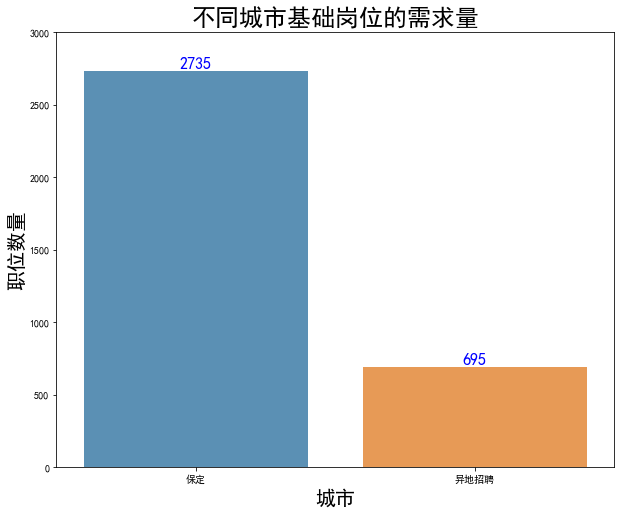

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

city_count = jobs.groupby(['Location'])['Location'].count()
print(city_count)
city_count2 = city_count.sort_values(ascending=False)
ax = plt.figure(figsize=(10, 8)).add_subplot(111)
sns.barplot(city_count.index, city_count.values, alpha=0.8)
ax.set_ylim([0, 3000])
ax.set_xlabel('城市', fontsize=20)
ax.set_ylabel('职位数量', fontsize=20)
ax.set_title('不同城市基础岗位的需求量', size=24)
for x, y in zip(range(5), city_count.values):
    ax.text(x, y, '%d'%y, ha='center', va='bottom', fontsize=16, color='b')
plt.show()

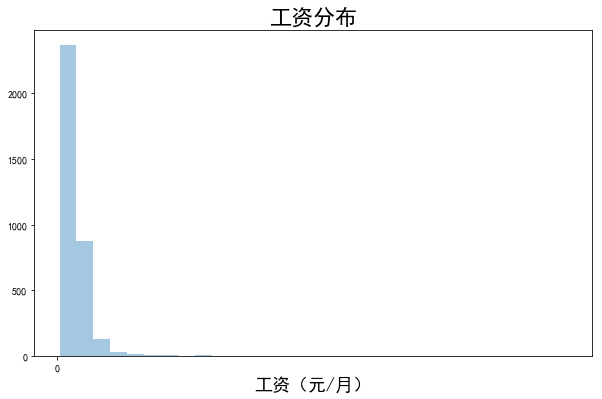

In [203]:
ax2 = plt.figure(figsize=(10, 6)).add_subplot(111)
sns.distplot(jobs['Salary'].astype(float), kde=False, bins=30)
ax2.set_title('工资分布', fontsize=22)
ax2.set_xlabel('工资（元/月）', fontsize=18)
ax2.set_xticks(range(0, 100, 10000))
plt.show()